This project involves the time series forecasting of the mean inpatient waiting time in UK for the next 5 years.Data from 1999 January to 2009 December is available at https://www.opendatani.gov.uk

In [3]:
#importing data
wtdata <- read.csv(file="waittime.csv",header=F,sep=',')$V1

In [4]:
head(wtdata)

[1] 19.1 19.0 18.6 18.6 18.6 18.5

In [5]:
tsdata<-ts(wtdata, frequency = 12, start = c(1999, 1)) # coverting wtdata into time series data

In [6]:
tsdata

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1999,19.1,19.0,18.6,18.6,18.6,18.5,18.5,18.6,18.6,18.6,18.2,18.6
2000,18.9,19.0,18.7,18.9,19.0,18.9,18.7,18.8,18.9,18.6,18.2,18.7
2001,18.6,18.5,18.1,18.4,18.7,18.8,18.7,18.8,18.8,18.3,17.6,18.0
2002,18.0,17.7,17.4,17.4,17.4,17.6,17.4,17.7,17.4,17.1,16.7,16.8
2003,16.8,16.5,16.6,15.8,15.9,15.7,15.4,15.5,15.3,14.9,14.3,14.4
2004,14.3,13.7,12.4,11.8,12.0,11.7,11.4,11.6,11.3,11.3,10.8,11.2
2005,11.3,11.1,10.5,10.5,10.5,10.2,10.2,10.2,9.8,9.4,8.5,8.8
2006,8.9,8.9,8.7,8.9,8.8,8.6,8.5,8.8,8.7,8.5,8.7,8.8
2007,8.6,8.2,7.4,7.4,7.4,6.9,6.7,6.8,6.4,6.2,5.8,6.3
2008,6.0,5.5,5.6,5.3,5.5,5.3,5.3,5.7,5.4,5.3,5.1,5.8


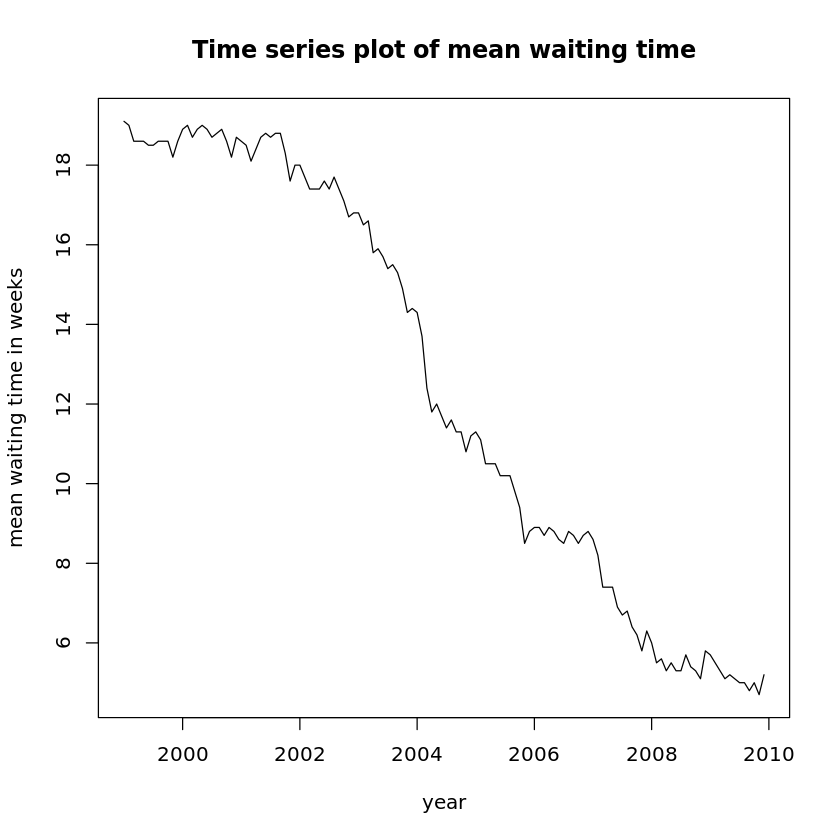

In [7]:
#plot of time series
plot(tsdata, ylab="mean waiting time in weeks", 
     main="Time series plot of mean waiting time", xlab="year")

In [9]:
#prints the cycle across years
cycle(tsdata)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1999,1,2,3,4,5,6,7,8,9,10,11,12
2000,1,2,3,4,5,6,7,8,9,10,11,12
2001,1,2,3,4,5,6,7,8,9,10,11,12
2002,1,2,3,4,5,6,7,8,9,10,11,12
2003,1,2,3,4,5,6,7,8,9,10,11,12
2004,1,2,3,4,5,6,7,8,9,10,11,12
2005,1,2,3,4,5,6,7,8,9,10,11,12
2006,1,2,3,4,5,6,7,8,9,10,11,12
2007,1,2,3,4,5,6,7,8,9,10,11,12
2008,1,2,3,4,5,6,7,8,9,10,11,12


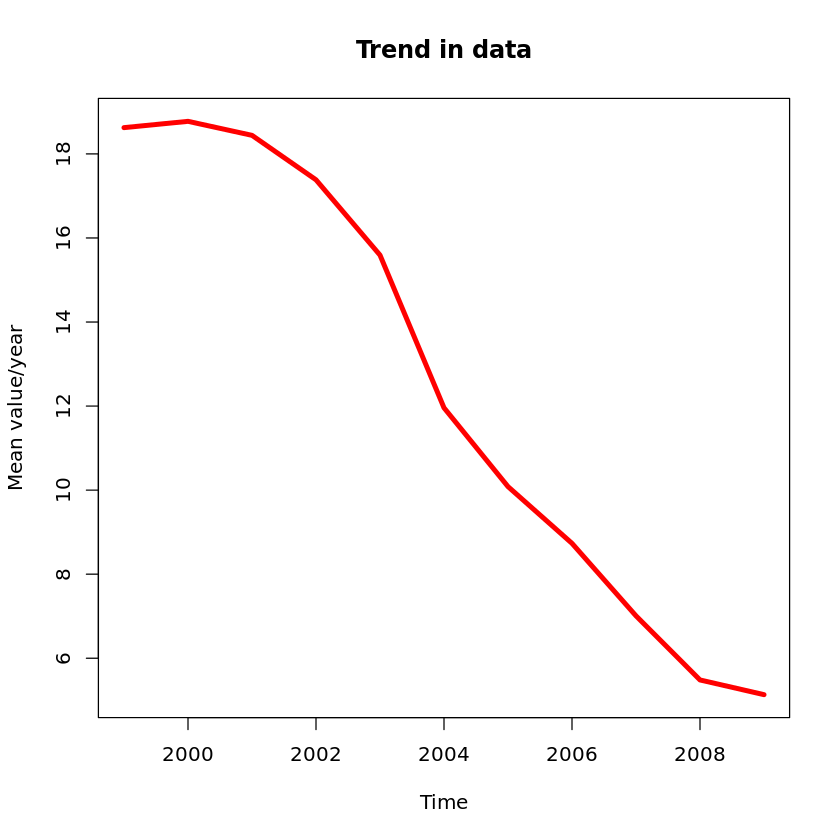

In [10]:
#this will aggregate the cycles and display a year on year trend
plot(aggregate(tsdata,FUN=mean),col="red", lwd=4, ylab="Mean value/year", main="Trend in data")

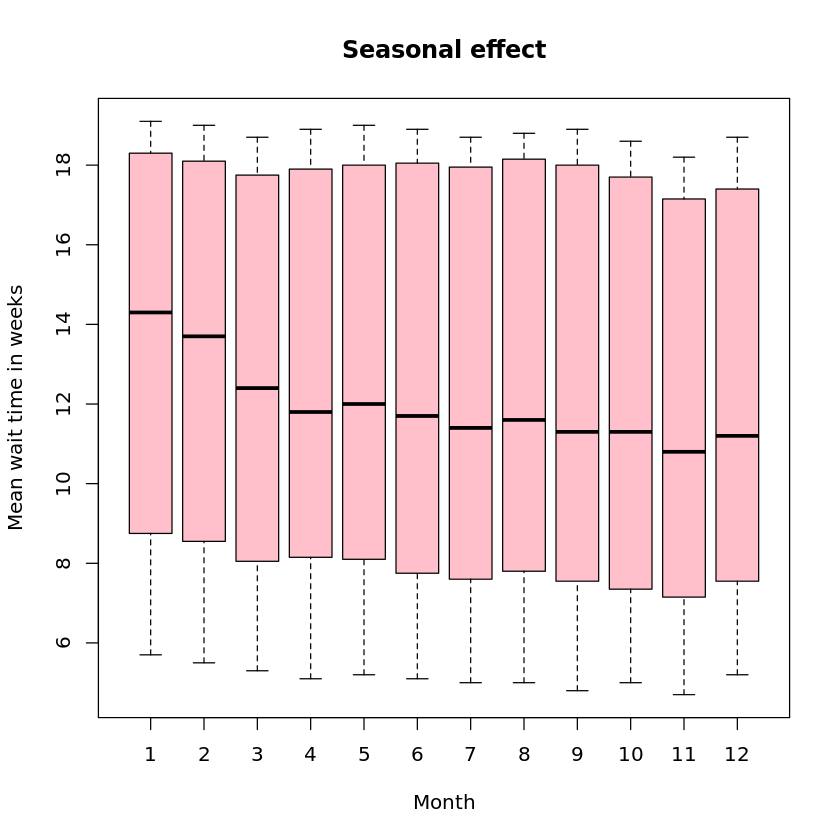

In [11]:
#box plot across months will give us a sense a seasonal effect
boxplot(tsdata~cycle(tsdata), main="Seasonal effect", ylab="Mean wait time in weeks", xlab="Month", col="pink")

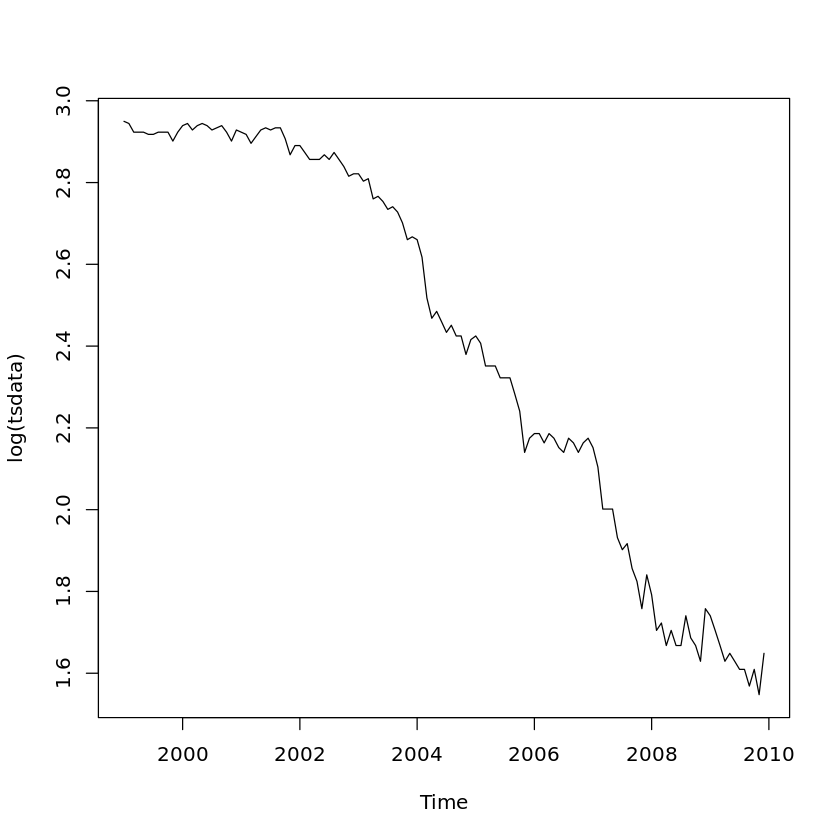

In [12]:
#log plotting will make the variance equal
plot(log(tsdata))

In [13]:
#creating test data excluding 2009 year
testdata<- ts(tsdata,frequency=12,start =c(1999,1),end=c(2008,12))

In [14]:
#fit an ARIMA model and predict the future 5 years
fit<-arima(log(testdata),c(0,1,1),
      seasonal = list(order=c(0,2,1),period=12))

In [15]:
fit


Call:
arima(x = log(testdata), order = c(0, 1, 1), seasonal = list(order = c(0, 2, 
    1), period = 12))

Coefficients:
         ma1     sma1
      0.0371  -0.9934
s.e.  0.0887   0.1235

sigma^2 estimated as 0.00115:  log likelihood = 170.16,  aic = -334.31

In [16]:
pred<- predict(fit,n.ahead = 5*12)
pred1<- 2.718^pred$pred

In [17]:
data1<-head(pred1,12)

In [18]:
data1

[1] 5.486189 4.983516 5.096330 4.793861 4.995229 4.796659 4.796617 5.197307
 [9] 4.894233 4.793585 4.604086 5.298453

In [19]:
predicted_2009<-round(data1, digits=1)
predicted_2009

[1] 5.5 5.0 5.1 4.8 5.0 4.8 4.8 5.2 4.9 4.8 4.6 5.3

In [20]:
original_2009<- tail(tsdata,12)
original_2009

[1] 5.7 5.5 5.3 5.1 5.2 5.1 5.0 5.0 4.8 5.0 4.7 5.2

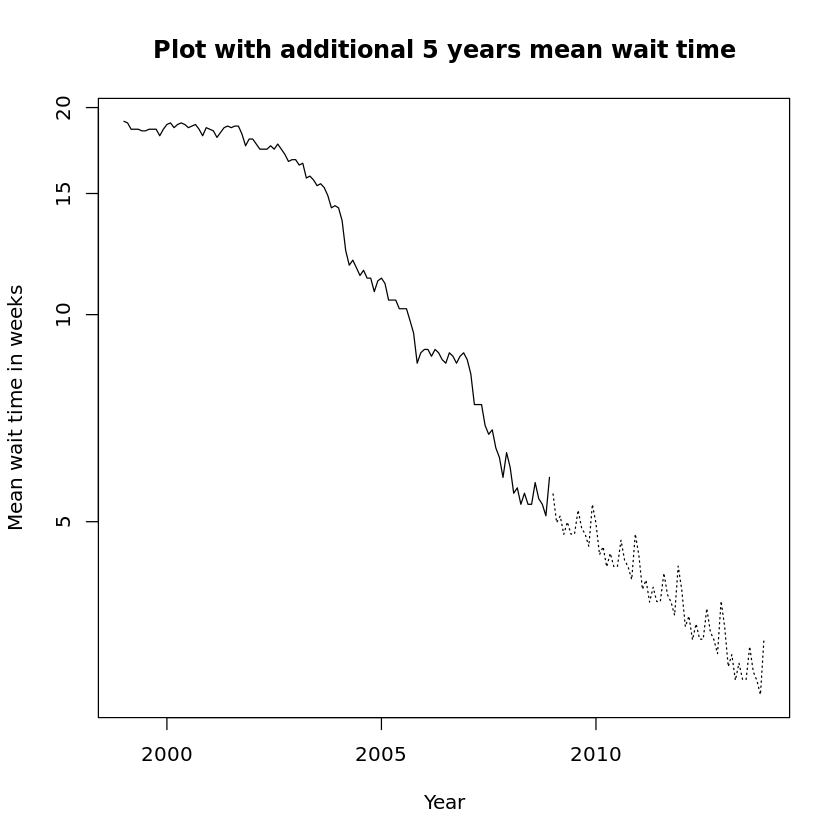

In [21]:
ts.plot(testdata,2.718^pred$pred, log="y", lty=c(1,3),xlab="Year", 
        ylab="Mean wait time in weeks", main="Plot with additional 5 years mean wait time")